# LIB IMPORT

In [9]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import json, codecs #sonucları kaydedip history bakmak icin
import warnings
warnings.filterwarnings("ignore")


# READY FOR LEARN 

<function matplotlib.pyplot.show(close=None, block=None)>

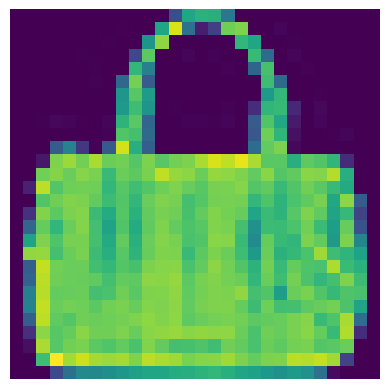

In [10]:
(x_train, _),(x_test, _) = fashion_mnist.load_data()#dataseti tanımlayıp tupleye koyma"_" kullanmayacağımız icin boş birşeye atama

x_train = x_train.astype("float32") /255.0
x_test = x_test.astype("float32") /255.0

x_train = x_train.reshape((len(x_train), x_train.shape[1:][0]*x_train.shape[1:][1]))
x_test = x_test.reshape((len(x_test), x_test.shape[1:][0]*x_test.shape[1:][1]))

plt.imshow(x_train[4000].reshape(28,28))
plt.axis("off")
plt.show

# AUTOENCODER MODEL

In [13]:
input_img = Input(shape=(784,)) #input layer olusturma

encoded = Dense(32, activation="relu")(input_img) # encoder olusturma "(input_img)" ile birbirine bağlıyoruz

encoded = Dense(16,activation="relu")(encoded)

decoded = Dense(32,activation="relu")(encoded)

decoded = Dense(784,activation="sigmoid")(decoded)

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer = "rmsprop", loss ="binary_crossentropy")

hist = autoencoder.fit(x_train,
                       x_train,
                       epochs =200,
                       batch_size=256,
                       shuffle = True,
                       validation_data = (x_train,x_train))


Epoch 1/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5513 - val_loss: 0.3831
Epoch 2/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3726 - val_loss: 0.3564
Epoch 3/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3508 - val_loss: 0.3386
Epoch 4/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3373 - val_loss: 0.3317
Epoch 5/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3291 - val_loss: 0.3273
Epoch 6/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3240 - val_loss: 0.3214
Epoch 7/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3214 - val_loss: 0.3218
Epoch 8/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3186 - val_loss: 0.3183
Epoch 9/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3176 - val_loss: 0.3152
Epoch 10/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3149 - val_loss: 0.3132
Epoch 11/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3123 - val_loss: 0.3136
Epoch 12/200
235/235 ━━━━━━━━━━━━━━━━━━━━

# SAVE MODEL

In [15]:
autoencoder.save_weights("autoencoder_model.weights.h5")

# VISUALIZATION

dict_keys(['loss', 'val_loss'])


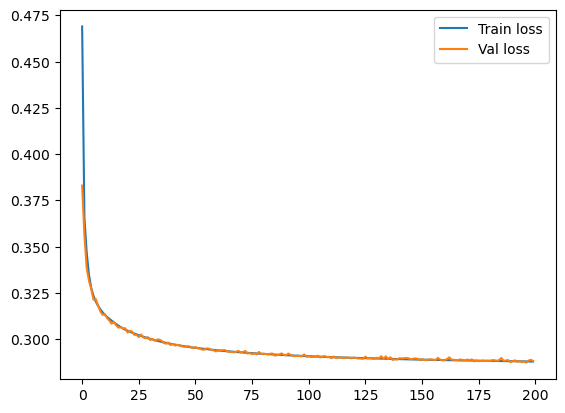

In [19]:
print(hist.history.keys())

plt.plot(hist.history["loss"],label = "Train loss")
plt.plot(hist.history["val_loss"],label = "Val loss")
plt.legend()
plt.show()

# SAVE HISTORY

In [20]:
with open("autoencoders_hist.json","w")as f:
    json.dump(hist.history,f)

# LOAD HISTORY

In [21]:
with codecs.open("autoencoders_hist.json","r",encoding="utf-8")as f:
    n = json.loads(f.read())

dict_keys(['loss', 'val_loss'])


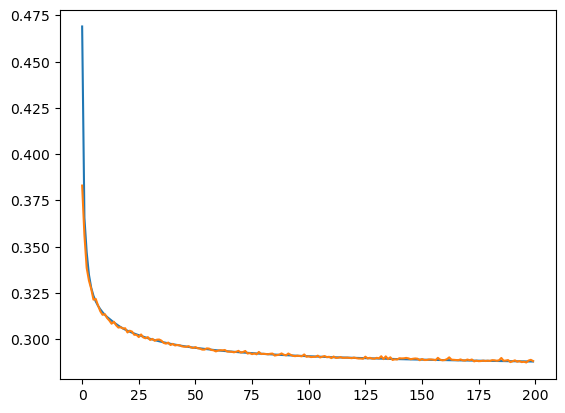

In [22]:
print(n.keys())
plt.plot(n["loss"],label = "Train loss")
plt.plot(n["val_loss"],label = "Val loss")

# TEST PREDICT AUTOENCODER LAYERS IMPLEMENTATION VISUALIZATION

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step


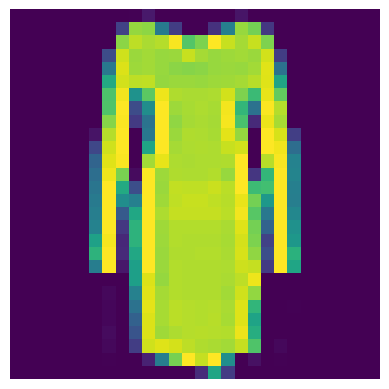

In [24]:
encoder = Model(input_img,encoded)

encoded_img = encoder.predict(x_test)
plt.imshow(x_test[1500].reshape(28,28))
plt.axis("off")
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step


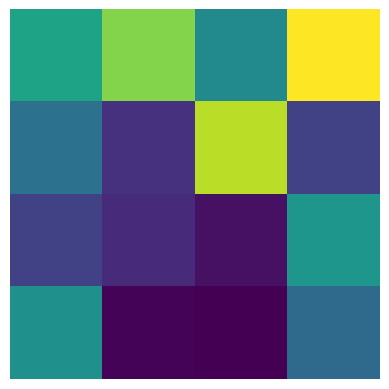

In [26]:
encoded_img = encoder.predict(x_test)
plt.imshow(encoded_img[1500].reshape(4,4))#vektor uzunlugu 16 oldugu icin 4,4 yazıyoruz
plt.axis("off")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step


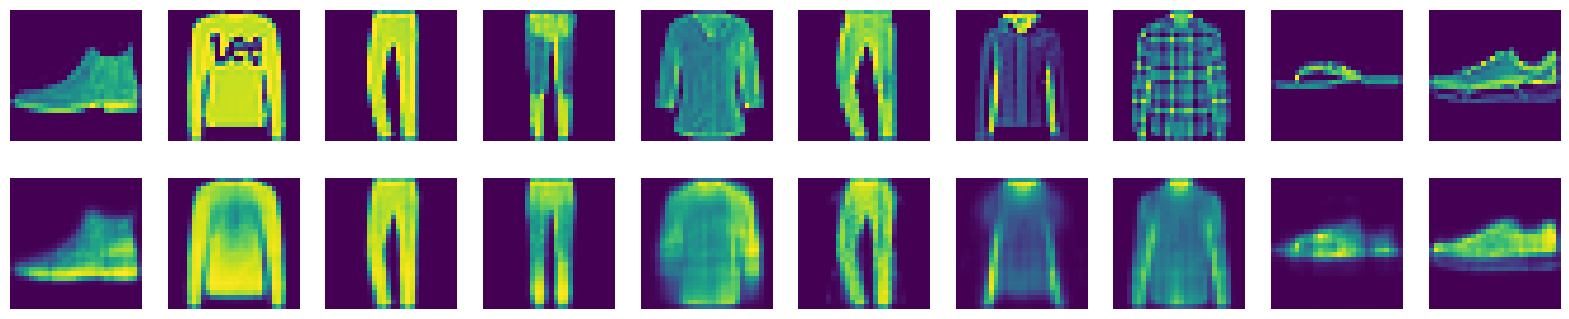

In [27]:
# KOD BLOGU KERASIN KENDI SITESINDEN ALINIMIS
decoded_img = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.axis("off")
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_img[i].reshape(28,28))
    plt.axis("off")
plt.show()    